# Decision Boundaries For Linear Discriminant Analysis

Assume that a classification is to be made. Given the parameters $\boldsymbol{\theta}$ and the input vector $\textbf{x}$, the class of the output variable $y$ is to be determined. The probability of $y$ being from the class $c$ is modeled using a discrete generative model as follows:
$$
p\left (y=c|\textbf{x}, \boldsymbol{\theta}\right )=\frac{p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )p\left ( y=c|\boldsymbol{\theta}\right )}{p\left (\textbf{x}|\boldsymbol{\theta} \right )}
$$
If a multivariate Gaussian distribution is used to model the class conditional distribution of the input vector, i.e. $p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )$, then this is called the quadratic discriminant analysis:
$$
p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )=\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma}_{c} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right )^{T}\boldsymbol{\Sigma}_{c}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c} \right )\right ]
$$
A special case of the quadratic discriminant analysis is when the covariance matrix of the Gaussian distibution for the class conditional density of the input features is common to all of the classes. That is the mean,
$$
\boldsymbol{\Sigma}_{c}=\boldsymbol{\Sigma}
$$
for all of the classes $c$. Then, $p\left (y=c|\textbf{x}, \boldsymbol{\theta}\right )$ can be calculated as follows:
$$
p\left (y=c|\textbf{x}, \boldsymbol{\theta}\right )=\frac{p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )p\left ( y=c|\boldsymbol{\theta}\right )}{p\left (\textbf{x}|\boldsymbol{\theta} \right )}=\frac{p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )p\left ( y=c|\boldsymbol{\theta}\right )}{\sum_{s=1}^{C}p\left (x, y=s|\boldsymbol{\theta} \right )}=\frac{p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )p\left ( y=c|\boldsymbol{\theta}\right )}{\sum_{s=1}^{C}p\left (\textbf{x}|y=s, \boldsymbol{\theta}\right )p\left ( y=s|\boldsymbol{\theta}\right )} \Rightarrow
$$
$$
p\left (y=c|\textbf{x}, \boldsymbol{\theta}\right )=\frac{\pi_{c}p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )}{\sum_{s=1}^{C}\pi_{s}p\left (\textbf{x}|y=s, \boldsymbol{\theta}\right )}=\frac{\pi_{c}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right )^{T}\boldsymbol{\Sigma}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c} \right )\right ]}{\sum_{s=1}^{C} \pi_{s}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{s} \right )^{T}\boldsymbol{\Sigma}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{s} \right )\right ]}
$$
Let the expression
$$
-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right )^{T}\boldsymbol{\Sigma}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c} \right )
$$
be simplified:
$$
-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right )^{T}\boldsymbol{\Sigma}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c} \right )=-\frac{1}{2}\left (\textbf{x}^{T}-\boldsymbol{\mu}_{c}^{T} \right )\left ( \boldsymbol{\Sigma}^{-1}\textbf{x}-\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}\right )=-\frac{1}{2}\left (\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x}-\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}-\boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x}+ \boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}\right )=
$$
$$
-\frac{1}{2}\left (\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x}-2\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}+ \boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}\right )=-\frac{1}{2}\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x}+\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}-\frac{1}{2}\boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}
$$
The simplified expression is put into the class probability conditioned on the input and parameters:
$$
p\left (y=c|\textbf{x}, \boldsymbol{\theta}\right )=\frac{\pi_{c}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right )^{T}\boldsymbol{\Sigma}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c} \right )\right ]}{\sum_{s=1}^{C} \pi_{s}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{s} \right )^{T}\boldsymbol{\Sigma}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{s} \right )\right ]}=\frac{\pi_{c}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left [-\frac{1}{2}\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x}+\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}-\frac{1}{2}\boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}\right ]}{\sum_{s=1}^{C} \pi_{s}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left [-\frac{1}{2}\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x}+\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}-\frac{1}{2}\boldsymbol{\mu}_{s}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}\right ]}=
$$
$$
\frac{\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left ( -\frac{1}{2}\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x}\right )\pi_{c}\exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}-\frac{1}{2}\boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}\right ]}{\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma} \right |^{1/2}}\exp \left (-\frac{1}{2}\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\textbf{x} \right )\sum_{s=1}^{C} \pi_{s}\exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}-\frac{1}{2}\boldsymbol{\mu}_{s}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}\right ]}=\frac{\pi_{c}\exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}-\frac{1}{2}\boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}\right ]}{\sum_{s=1}^{C} \pi_{s}\exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}-\frac{1}{2}\boldsymbol{\mu}_{s}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}\right ]} \Rightarrow 
$$
$$
p\left (y=c|\textbf{x}, \boldsymbol{\theta}\right )=\frac{\exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}+\log \pi_{c}-\frac{1}{2}\boldsymbol{\mu}_{c}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c}\right ]}{\sum_{s=1}^{C} \exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}+\log \pi_{s}-\frac{1}{2}\boldsymbol{\mu}_{s}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}\right ]}
$$
The boundary separating two classes $c_{1}$ and $c_{2}$ is a linear function of $\textbf{x}$. Hence, this analysis is called the linear discriminant analysis. The equation for this linear boundary can be derived as follows:
$$
p\left (y=c_{1}|\textbf{x}, \boldsymbol{\theta}\right )=p\left (y=c_{2}|\textbf{x}, \boldsymbol{\theta}\right ) \Rightarrow
$$
$$
\frac{\exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}+\log \pi_{c_{1}}-\frac{1}{2}\boldsymbol{\mu}_{c_{1}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}\right ]}{\sum_{s=1}^{C} \exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}+\log \pi_{s}-\frac{1}{2}\boldsymbol{\mu}_{s}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}\right ]}=\frac{\exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}+\log \pi_{c_{2}}-\frac{1}{2}\boldsymbol{\mu}_{c_{2}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}\right ]}{\sum_{s=1}^{C} \exp \left [\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}+\log \pi_{s}-\frac{1}{2}\boldsymbol{\mu}_{s}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{s}\right ]} \Rightarrow
$$
$$
\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}+\log \pi_{c_{1}}-\frac{1}{2}\boldsymbol{\mu}_{c_{1}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}=\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}+\log \pi_{c_{2}}-\frac{1}{2}\boldsymbol{\mu}_{c_{2}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}} \Rightarrow
$$
$$
\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\textbf{x}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}=\frac{1}{2}\boldsymbol{\mu}_{c_{1}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\frac{1}{2}\boldsymbol{\mu}_{c_{2}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}+\log \pi_{c_{2}}-\log \pi_{c_{1}} \Rightarrow
$$
$$
\textbf{x}^{T} \left (\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}} \right )=\frac{1}{2}\boldsymbol{\mu}_{c_{1}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\frac{1}{2}\boldsymbol{\mu}_{c_{2}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}+\log \pi_{c_{2}}-\log \pi_{c_{1}}
$$
Assume that there are only two features which means that $\textbf{x}$ vector is two dimensional. Then, the equation of the boundary is as follows:
$$
\beta_{1}x_{1}+ \beta_{2}x_{2}=constant
$$
where
$$\textbf{x}=\begin{bmatrix}
x_{1} \\
x_{2}
\end{bmatrix}, \boldsymbol{\beta}=\begin{bmatrix}
\beta_{1} \\
\beta_{2}
\end{bmatrix}=\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}, constant=\frac{1}{2}\boldsymbol{\mu}_{c_{1}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\frac{1}{2}\boldsymbol{\mu}_{c_{2}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}+\log \pi_{c_{2}}-\log \pi_{c_{1}}
$$

The covariance matrix of the distribution is to be formed. It must be positive definite. Let the distribution's eigenvectors be $v_1$ and $v_{2}$. Let the corresponding eigenvalues be $\lambda_{1}$ and $\lambda_{2}$ respectively. Then:
$$
\boldsymbol{\Sigma}_{c}=\begin{bmatrix}
v_{1} & v_{2}
\end{bmatrix}\begin{bmatrix}
\lambda_{1} & 0 \\
0 & \lambda_{2}
\end{bmatrix}\begin{bmatrix}
v_{1} & v_{2}
\end{bmatrix}^{-1}
$$

In [1]:
import numpy as np
v1_t = np.array([1, 3])
v1_t = v1_t / np.linalg.norm(v1_t) # transpose of the first eigenvector
v2_t = np.array([3, -1]) # transpose of the second eigenvector
v2_t = v2_t / np.linalg.norm(v2_t)
eigenvector_matrix = np.array([v1_t, v2_t]).transpose() # eigenvector matrix
lambda1 = 1 # first eigenvalue
lambda2 = 2 # second eigenvalue
eigenvalue_matrix = np.array([[lambda1, 0],[0, lambda2]])
print("the eigenvector matrix of the distributions:")
print(eigenvector_matrix)
print("the eigenvalue matrix of the distributions")
print(eigenvalue_matrix)
cov = np.matmul(np.matmul(eigenvector_matrix, eigenvalue_matrix), np.linalg.inv(eigenvector_matrix))
print("the covariance matrix of the distributions")
print(cov)

the eigenvector matrix of the distributions:
[[ 0.31622777  0.9486833 ]
 [ 0.9486833  -0.31622777]]
the eigenvalue matrix of the distributions
[[1 0]
 [0 2]]
the covariance matrix of the distributions
[[ 1.9 -0.3]
 [-0.3  1.1]]


In [2]:
mean_1_t = np.array([1.0, 1.0]) # the mean vector of the first distribution
print("transpose of the mean vector of the first distribution")
print(mean_1_t)

transpose of the mean vector of the first distribution
[1. 1.]


In [3]:
mean_2_t = np.array([3.0, 3.0]) # the mean vector of the second distribution
print("transpose of the mean vector of the second distribution")
print(mean_2_t)

transpose of the mean vector of the second distribution
[3. 3.]


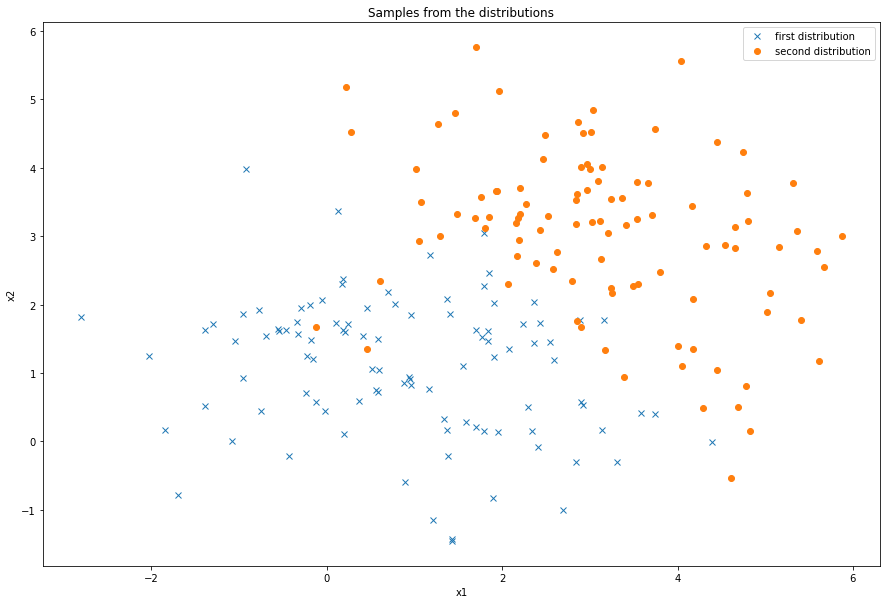

In [4]:
import matplotlib.pyplot as plt

# samples from the first distribution
x1_s, y1_s = np.random.default_rng().multivariate_normal(mean_1_t, cov, 100).T

# samples from the second distribution
x2_s, y2_s = np.random.default_rng().multivariate_normal(mean_2_t, cov, 100).T

fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x1_s, y1_s, 'x', label='first distribution')
_ = ax.plot(x2_s, y2_s, 'o', label='second distribution')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Samples from the distributions')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

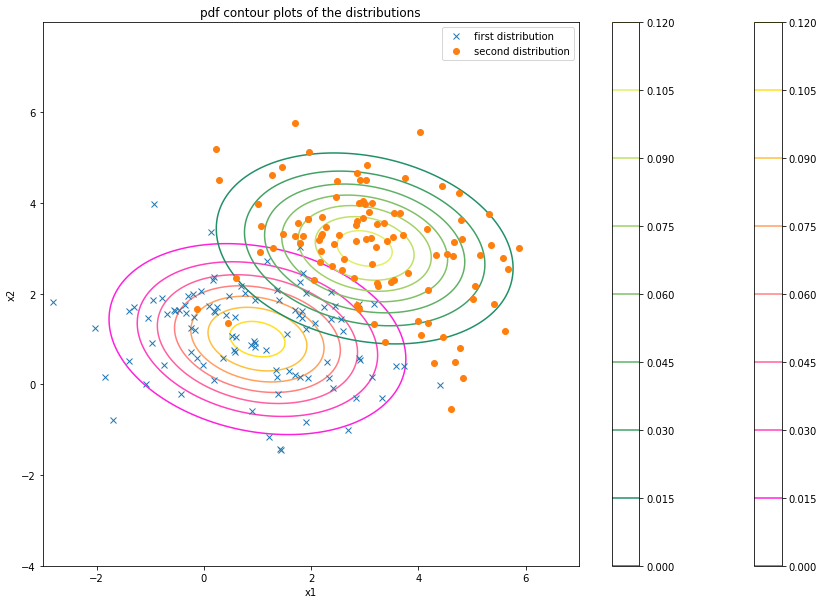

In [5]:
from scipy.stats import multivariate_normal

x_min = -3.0
x_max = 7.0
y_min = -4.0
y_max = 8.0
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(mean_1_t, cov)
rv2 = multivariate_normal(mean_2_t, cov)

cmap1 = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("summer")

fig, ax = plt.subplots(figsize=(15, 10))
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)
_ = fig.colorbar(contour_plot_1, ax=ax)
_ = fig.colorbar(contour_plot_2, ax=ax)

_ = ax.plot(x1_s, y1_s, 'x', label='first distribution')
_ = ax.plot(x2_s, y2_s, 'o', label='second distribution')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)

_ = ax.set_title('pdf contour plots of the distributions')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

The equation to be solved for determining the decision boundary and the related variables are repeated:
$$
\beta_{1}x_{1}+ \beta_{2}x_{2}=constant
$$
where
$$\textbf{x}=\begin{bmatrix}
x_{1} \\
x_{2}
\end{bmatrix}, \boldsymbol{\beta}=\begin{bmatrix}
\beta_{1} \\
\beta_{2}
\end{bmatrix}=\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}, constant=\frac{1}{2}\boldsymbol{\mu}_{c_{1}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{1}}-\frac{1}{2}\boldsymbol{\mu}_{c_{2}}^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_{c_{2}}+\log \pi_{c_{2}}-\log \pi_{c_{1}}
$$

In [6]:
beta = np.matmul(np.linalg.inv(cov), (mean_1_t-mean_2_t))
beta1 = beta[0]
beta2 = beta[1]
pi_c1 = 0.5
pi_c2 = 0.5
constant = 0.5*((mean_1_t*np.matmul(np.linalg.inv(cov), mean_1_t)).sum()-
                (mean_2_t*np.matmul(np.linalg.inv(cov), mean_2_t)).sum())+np.log(pi_c2)-np.log(pi_c1)

x1 = np.arange(x_min, x_max, step=0.01)
x2 = (-beta1*x1 + constant)/beta2

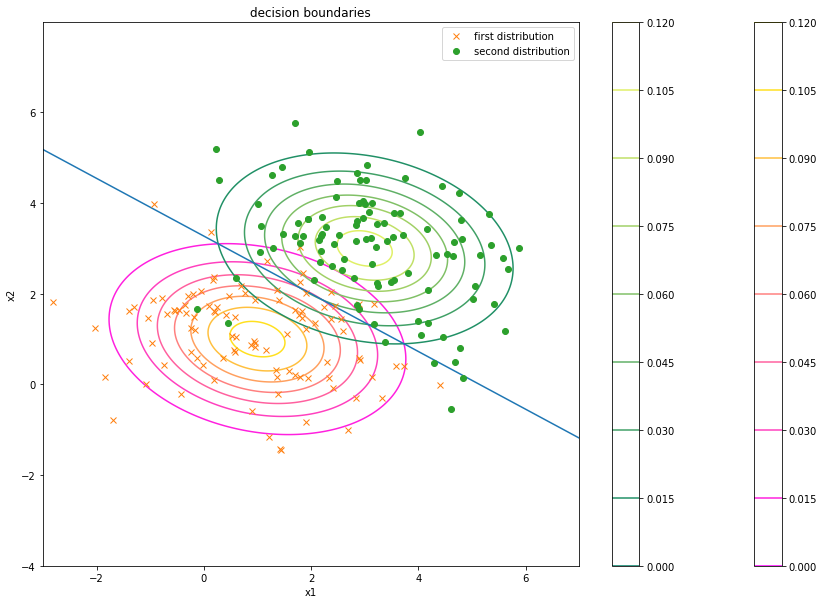

In [7]:
fig, ax = plt.subplots(figsize=(15.0, 10.0))
_ = ax.plot(x1, x2)
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)
_ = fig.colorbar(contour_plot_1, ax=ax)
_ = fig.colorbar(contour_plot_2, ax=ax)

_ = ax.plot(x1_s, y1_s, 'x', label='first distribution')
_ = ax.plot(x2_s, y2_s, 'o', label='second distribution')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)

_ = ax.set_title('decision boundaries')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

# References
Machine Learning A Probabilistic Perspective, Kevin P. Murphy